# Nonlinear Equations

We want to find a root of the nonlinear function $f$ using different methods.

1. Bisection method
2. Newton method
3. Chord method
4. Secant method
5. Fixed point iterations





In [2]:
%matplotlib inline
from numpy import *
from matplotlib.pyplot import *
import sympy as sym


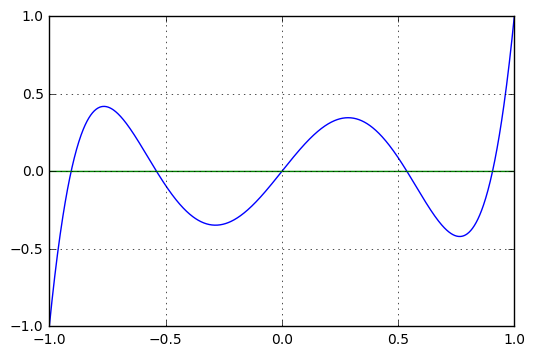

In [7]:
t = sym.symbols('t')

f_sym = t/8. * (63.*t**4 - 70.*t**2. +15.) # Legendre polynomial of order 5

f_prime_sym = sym.diff(f_sym,t)

f = sym.lambdify(t, f_sym, 'numpy')
f_prime = sym.lambdify(t,f_prime_sym, 'numpy')

phi1 = lambda x : 63./70.*x**3 + 15./(70.*x)
phi2 = lambda x : 70.0/15.0*x**3 - 63.0/15.0*x**5
phi3 = lambda x : sqrt((63.*x**4 + 15.0)/70.)

# Let's plot
n = 1025

x = linspace(-1,1,n)
c = zeros_like(x)

_ = plot(x,f(x))
_ = plot(x,c)
_ = grid()


In [4]:
# Initial data for the variuos algorithms

# interval in which we seek the solution 
# a = -1.0
# b = -0.75
a = 0.7
b = 1

# initial points
x0 = (a+b)/2.0
x00 = b


In [5]:
# stopping criteria
eps = 1e-10
n_max = 1000

## Bisection method

$$
x^k = \frac{a^k+b^k}{2}
$$
```
                   if (f(a_k) * f(x_k)) < 0:
                      b_k1 = x
                      a_k1 = a_k
                   else:
                      a_k1 = x
                      b_k1 = b_k
```

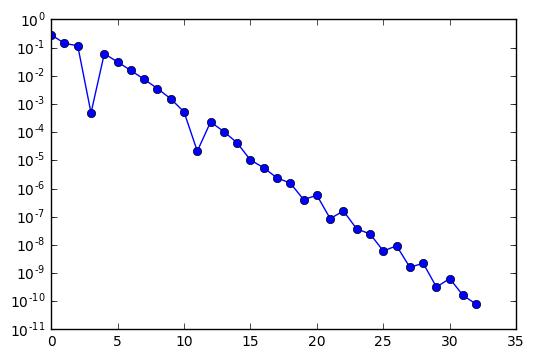

In [9]:
def bisect(f,a,b,eps,n_max):
    a_k, b_k = a, b
    delta = 1 + eps
    n = 0
    errors = []

    while ( ( delta > eps ) and ( n < n_max ) ):
        x_k = (a_k+b_k)*0.5
        
        if (f(a_k) * f(x_k)) < 0:
            b_k1 = x_k
            a_k1 = a_k
        else:
            a_k1 = x_k
            b_k1 = b_k
        
#         delta = b_k1 - a_k1
        delta = np.abs(f(x_k))
        errors.append(delta)
        a_k,b_k = a_k1,b_k1
        
        n += 1
    
    return x_k, n, errors

x, n, errors_bisect = bisect(f,a,b,eps,n_max)
_ = semilogy(errors_bisect,'o-')

In [10]:
# from timeit import timeit

# def testbisect(): x, n, error = bisect(f,a,b,eps,n_max)    
# timeit(testbisect,number=1000)

In [11]:
# is the number of iterations coherent with the theoretical estimation?

In order to find out other methods for solving non-linear equations, let's compute the Taylor's series of $f(x^k)$ up to the first order 

$$
f(x^k) \simeq f(x^k) + (x-x^k)f^{\prime}(x^k)
$$
which suggests the following iterative scheme
$$
x^{k+1} = x^k - \frac{f(x^k)}{f^{\prime}(x^k)}
$$

The following methods are obtained applying the above scheme where

$$
f^{\prime}(x^k) \approx q^k
$$

## Newton's method
$$
q^k = f^{\prime}(x^k)
$$

$$
x^{k+1} = x^k - \frac{f(x^k)}{q^k}
$$

0.906179845938664

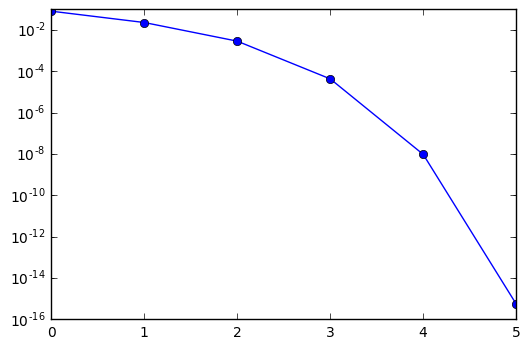

In [12]:
def newton(f,f_prime,x0,eps,n_max):
    x_k = x0
    
    delta  = 1+eps
    n = 0
    errors = []
    
    while (delta > eps and n < n_max):
        q_k = f_prime(x_k)
        x_k1 = x_k - f(x_k) / q_k
    
        delta = abs(x_k1 - x_k)     # Control of increment
#         delta = abs(f(x_k))       # Control of residual
        errors.append(delta)
        
        x_k = x_k1
        
        n += 1
    
    return x_k, n, errors

x_k, n, errors_newton = newton(f,f_prime,x0,eps,n_max)
_ = semilogy(errors_newton,'o-')
x_k

## Chord method / Rope method

$$
q^k \equiv q = \frac{f(b)-f(a)}{b-a}
$$

or 

$$
q^k \equiv q = f'(x^{(0)})
$$

$$
x^{k+1} = x^k - \frac{f(x^k)}{q}
$$

0.9061798459159386

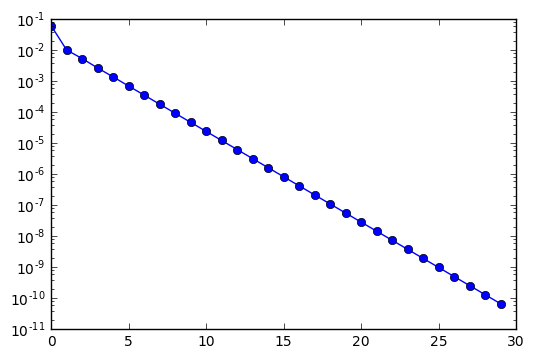

In [13]:
def chord(f,a,b,x0,eps,n_max):
    
    x_k = x0
    q_k = (f(b) - f(a))/(b-a)
    
    delta  = 1+eps
    n = 0
    errors = []
    
    while (delta > eps and n < n_max):

        x_k1 = x_k - f(x_k) / q_k
        
        delta = abs(x_k1 - x_k)
#         delta = abs(f(x_k))
        errors.append(delta)

        x_k = x_k1
        
        n += 1
    
    return x_k, n, errors

x_k, n, errors_chord = chord(f,a,b,x0,eps,n_max)
_ = semilogy(errors_chord,'o-')
x_k

## Secant method

$$
q^k = \frac{f(x^k)-f(x^{k-1})}{x^k - x^{k-1}}
$$

$$
x^{k+1} = x^k - \frac{f(x^k)}{q^k}
$$

Note that this algorithm requirs **two** initial points

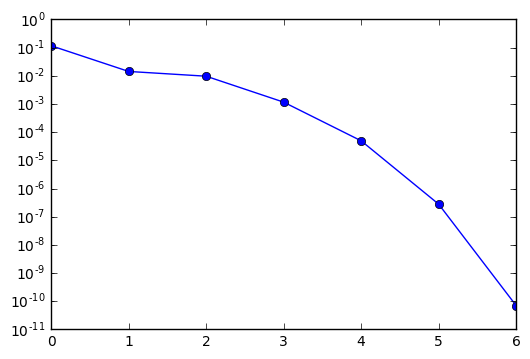

In [14]:
def secant(f,x0,x00,eps,n_max):
    x_k  = x00
    x_km = x0
    
    delta  = 1+eps
    n = 0
    errors = []
    
    while (delta > eps and n < n_max):
        q_k = (f(x_k) - f(x_km))/(x_k - x_km)
        x_kp = x_k - f(x_k) / q_k
    
        delta = abs(x_kp - x_k)
        errors.append(delta)
    
        x_km = x_k
        x_k = x_kp
        
        
        n += 1
    
    return x_k, n, errors

x_k, n, errors_secant = secant(f,x0,x00,eps,n_max)
_ = semilogy(errors_secant,'o-')

## Fixed point iterations

$$
f(x)=0 \to x-\phi(x)=0
$$

$$
x^{k+1} = \phi(x^k)
$$

(0.5384693101614852, 1.403702973881437e-12, 0.53846931024792388)


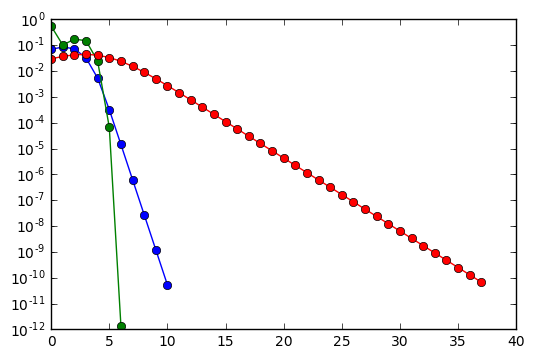

In [15]:
def fixed_point(phi,x0,eps,n_max):
    x_k = x0
    
    delta  = 1+eps
    n = 0
    errors = []
    
    while (delta > eps and n < n_max):
        
        x_k1 = phi(x_k)
        
        delta = abs( x_k1 - phi(x_k1) )
        errors.append(delta)
        x_k = x_k1
        
        n += 1
    
    return x_k, n, errors

x_k1, n, errors_fp1 = fixed_point(phi1,x0,eps,n_max)
x_k2, n, errors_fp2 = fixed_point(phi2,x0,eps,n_max)
x_k3, n, errors_fp3 = fixed_point(phi3,x0,eps,n_max)
_ = semilogy(errors_fp1,'o-')
_ = semilogy(errors_fp2,'o-')
_ = semilogy(errors_fp3,'o-')
print(x_k1,x_k2,x_k3)

## Comparison

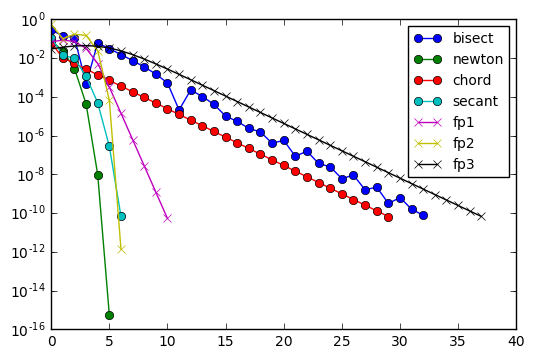

In [16]:
_ = semilogy(errors_bisect,'-o',label='bisect')
_ = semilogy(errors_newton,'-o',label='newton')
_ = semilogy(errors_chord,'-o',label='chord')
_ = semilogy(errors_secant,'-o',label='secant')
_ = semilogy(errors_fp1,'x-',label='fp1')
_ = semilogy(errors_fp2,'x-',label='fp2')
_ = semilogy(errors_fp3,'x-',label='fp3')
_ = legend(loc=0,fontsize=10)

* Newton method -> fastest convergence
* Bisection -> Non-monotonic behaviour

In [ ]:
# Let's compare the scipy implmentation of Newton's method with our..

In [145]:
%time 

CPU times: user 4 µs, sys: 7 µs, total: 11 µs
Wall time: 36 µs
